# Anthony Botello
## HW2, PHYS 434 AD

In [27]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# 1

Of the 36 possible outcomes, 6 sum to 7 while only 1 sums to 2. Therefore, the odds of rolling a 7 over a 2 are 6:1.

# 2

### Analytical solution:

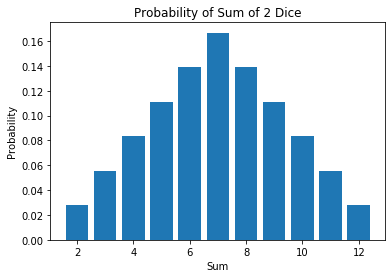

In [28]:
single = [1/6,1/6,1/6,1/6,1/6,1/6] # list of probabilities for single die roll
x = [] # x axis

def dice_convolution(num_dice): # iterative method for convolving two dice 
    probs = []
    for i in range(1,num_dice*6): 
        prob_sum = 0
        for z in range(6):
            if 0 < (i-z) <= 6:
                prob_sum += single[z-1]*single[i-z-1]
        probs.append(prob_sum)
        x.append(i+1)
    return probs

p_analytical = dice_convolution(2) # list of analytically calculated probabilities of sum of two dice

def dice_sum_plot(x_axis,sum_probs,num_dice): # creates probability plot
    fig, ax = plt.subplots(1,1)
    ax.bar(x,sum_probs)
    ax.set_title(f'Probability of Sum of {num_dice} Dice')
    ax.set_xlabel("Sum")
    ax.set_ylabel("Probability")
    plt.show()
dice_sum_plot(x,p_analytical,2)

### Numerical solution:

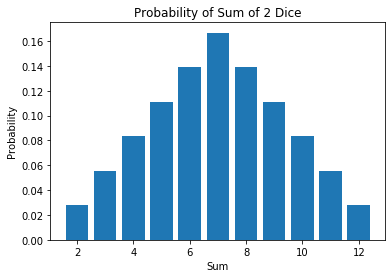

In [29]:
p_numerical = np.convolve(single,single)
dice_sum_plot(x,p_numerical,2)

# 3

### Mean

In [30]:
print(f'Mean: {np.mean(x)}')

Mean: 7.0


### Variance

Since the two dice rolls are independent events, the variance of the sum of two dice is twice the variance of a single dice roll.

In [31]:
print(f'Variance: {2*np.var([1,2,3,4,5,6])}')

Variance: 5.833333333333333


# 4

Totally Gaussian. Central limit theorem. Look below.

In [35]:
def weighted_avg_var(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return average, variance

def conv_dice(num_dice,dist=single):
    if num_dice > 1:
        return conv_dice(num_dice - 1,np.convolve(single,dist))
    else:
        return dist

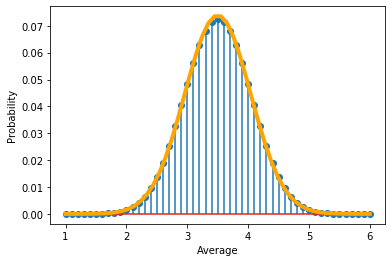

In [36]:
dist = conv_dice(10)
x = np.arange(10,61)
ex = np.linspace(1,6)
avg,var = weighted_avg_var(x/10,dist)
gauss = stats.norm(loc=avg,scale=np.sqrt(var))

fig,ax = plt.subplots(1,1)
ax.stem(x/10,conv_dice(10),use_line_collection=True)
ax.plot(ex,gauss.pdf(ex)/10,color='orange',linewidth=4)
ax.set_xlabel('Average')
ax.set_ylabel('Probability')
plt.show()

# 5

The sum of a two probability distributions is equal to their convolution: $$P_{A+B}(X) = P_A(X)*P_B(X).$$ The convolution theorem states that $$\mathcal{F}\{P_A(X)*P_B(X)\} = \mathcal{F}\{P_A(X)\}\cdot\mathcal{F}\{P_B(X)\},$$ where $\mathcal{F}$ is the Fourier transform operator. The Fourier transform of a Gaussian distribution $N(X;\mu,\sigma^2) $ is $$\mathcal{F}\left\{\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}\right\} = e^{i\mu\omega}e^{-\frac{\sigma^2\omega^2}{2}}.$$ Therefore, $$N(X_1;\mu_1,\sigma_1^2)*N(X_2;\mu_2,\sigma_2^2) = \mathcal{F}^{-1}\left\{e^{i\mu_1\omega}e^{-\frac{\sigma_1^2\omega^2}{2}}e^{i\mu_2\omega}e^{-\frac{\sigma_2^2\omega^2}{2}}\right\}$$$$= \mathcal{F}^{-1}\left\{e^{i(\mu_1+\mu_2)\omega}e^{-\frac{(\sigma_1^2+\sigma_2^2)\omega^2}{2}}\right\}$$$$= N(X_1+X_2;\mu_1+\mu_2,\sigma_1^2+\sigma_2^2).$$ The new standard deviation $\sigma$ of the sum of $n$ normally distributed, independent random variables is $\sigma = \sqrt{\sum\limits_{i=1}^n\sigma_i^2}.$

In [37]:
gauss = stats.norm
x = np.linspace(gauss.ppf(0.001),gauss.ppf(0.999),1000)
def conv_gauss(num_times,dist=gauss.pdf(x)):
    if num_times > 1:
        return conv_gauss(num_times - 1, np.convolve(gauss.pdf(x),dist))
    return dist

def plot_gauss(num_times):
    dist = conv_gauss(num_times)
    axis = np.linspace(x[0],x[-1],len(dist))
    avg,var = weighted_avg_var(axis,dist)
    
    fig,ax = plt.subplots(1,1)
    ax.plot(axis,dist)
    ax.set_xlabel('X')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'$\mu$={np.round(avg,decimals=3)},$\sigma$={np.round(np.sqrt(var),decimals=3)}')
    plt.show()

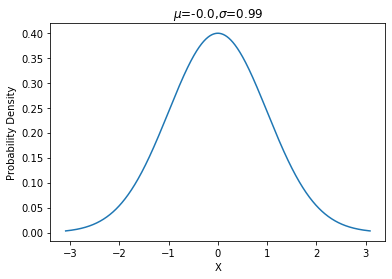

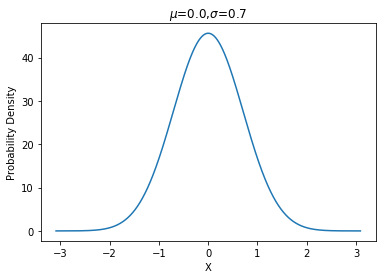

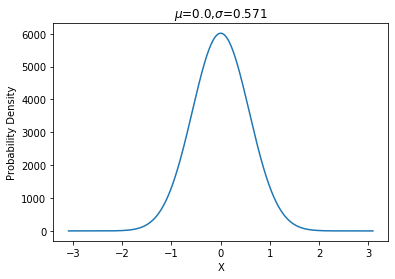

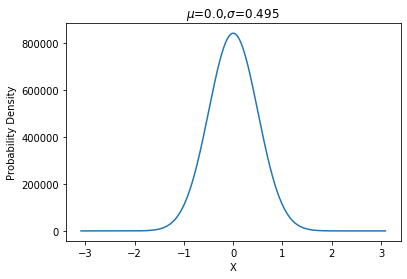

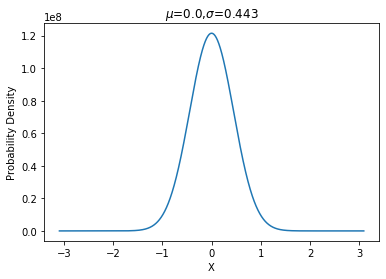

In [25]:
for i in range(1,6):
    plot_gauss(i)